In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
pd.set_option('display.max_columns',None)
df.loc[:,'tenure'].replace(to_replace=0,value=1,inplace=True)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Data Visualisation

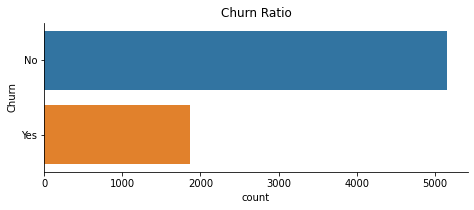

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')
plt.title('Churn Ratio')
plt.show()

Correlation of Churn with Variables

<AxesSubplot:>

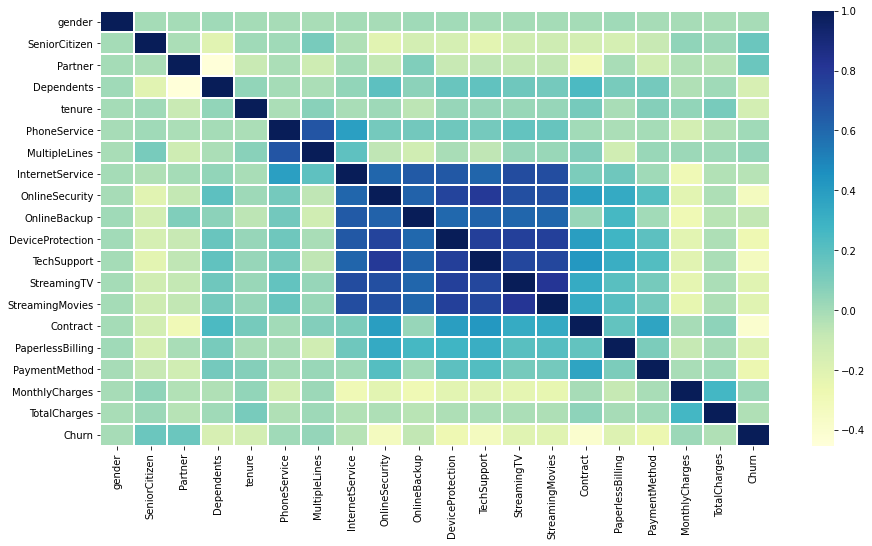

In [8]:
df2=df.iloc[:,1:]
df2['Churn'].replace(to_replace='Yes',value=1,inplace=True)
df2['Churn'].replace(to_replace='No',value=0,inplace=True)
plt.figure(figsize=(15,8))
corr = df2.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr,linewidths=.2,cmap='YlGnBu')

Numerical Features


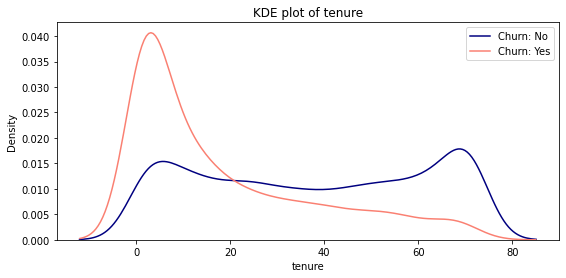

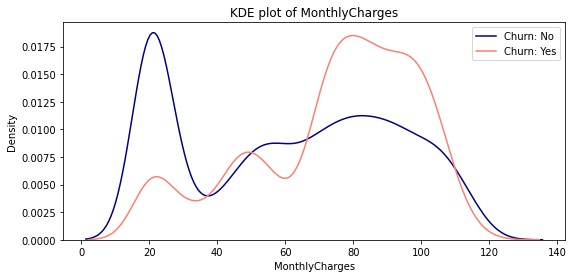

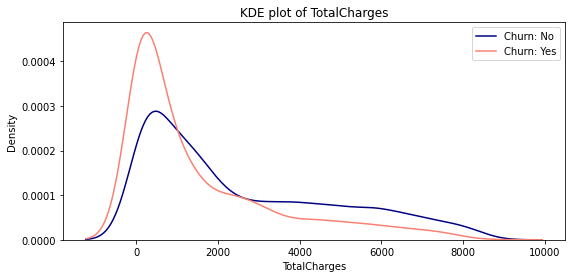

In [9]:
def kdeplot(feature):
    plt.figure(figsize=(9,4))
    plt.title(f'KDE plot of {feature}')
    ax0=sns.kdeplot(df[df['Churn']=='No'][feature],color='navy',label='Churn: No')
    ax1=sns.kdeplot(df[df['Churn']=='Yes'][feature],color='salmon',label='Churn: Yes')
    plt.legend(loc='best')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

Categorical Features


C:\Users\siddh\AppData\Local\Temp/ipykernel_5776/1963444524.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


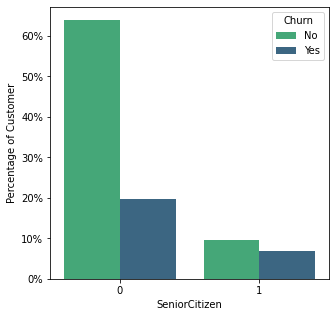

In [10]:
def barplot(feature,orient='v'):
    axis_name='Percentage of Customer'
    g=df.groupby(feature)['Churn'].value_counts().to_frame()
    g=g.rename({'Churn':axis_name},axis=1).reset_index()
    g[axis_name]=g[axis_name]/len(df)
    if(orient=='v'):
        ax=sns.barplot(x=feature,y=axis_name,data=g,orient=orient,hue="Churn",palette='viridis_r')
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient,palette='ocean_r')
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
        ax.plot()
    # plt.show()
plt.figure(figsize=(5,5))
barplot('SeniorCitizen')
# gist_heat,spring,plasma,twilight

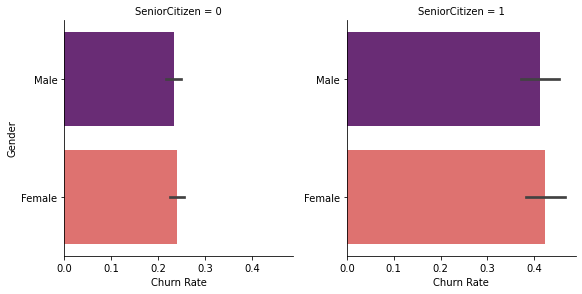

In [11]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen",sharey=False,height=4,aspect=1)
g.map_dataframe(sns.barplot, y="gender", x="churn_rate", palette = "magma", order= ['Male','Female'])
g.set_axis_labels('Churn Rate','Gender')
# g.set_titles('Is Senior Citizen {col_name}')

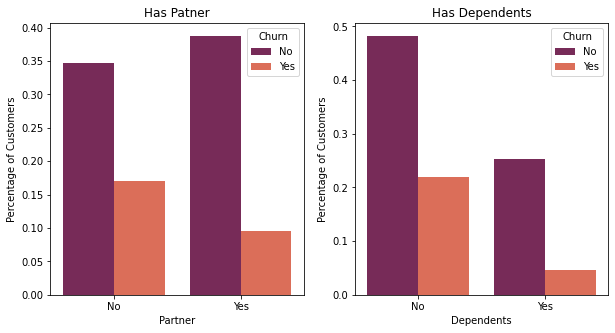

In [12]:
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(10,5))
ax0.set_title('Has Patner')
ax1.set_title('Has Dependents')
ax_y='Percentage of Customers'
g=df.groupby('Partner')['Churn'].value_counts()/len(df)
g=g.to_frame().rename({'Churn':ax_y},axis=1).reset_index()
ax=sns.barplot(x='Partner',y=ax_y,data=g,hue='Churn',palette='rocket',ax=ax0)
g=df.groupby('Dependents')['Churn'].value_counts()/len(df)
g=g.to_frame().rename({'Churn':ax_y},axis=1).reset_index()
ax=sns.barplot(x='Dependents',y=ax_y,data=g,hue='Churn',palette='rocket',ax=ax1)


C:\Users\siddh\AppData\Local\Temp/ipykernel_5776/1963444524.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


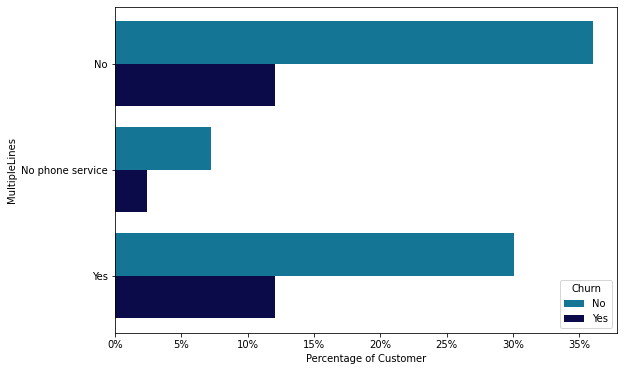

In [13]:
plt.figure(figsize=(9,6))
barplot('MultipleLines','h')

C:\Users\siddh\AppData\Local\Temp/ipykernel_5776/1963444524.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


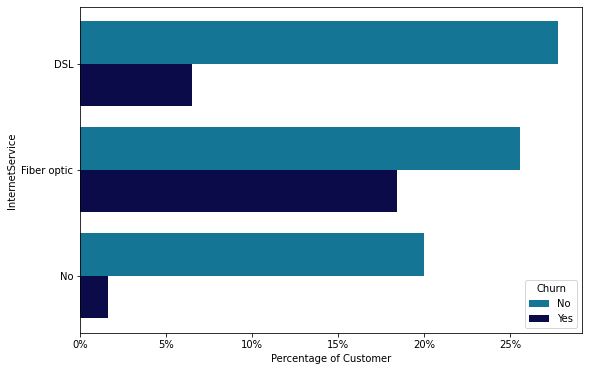

In [14]:
plt.figure(figsize=(9,6))
barplot('InternetService','h')

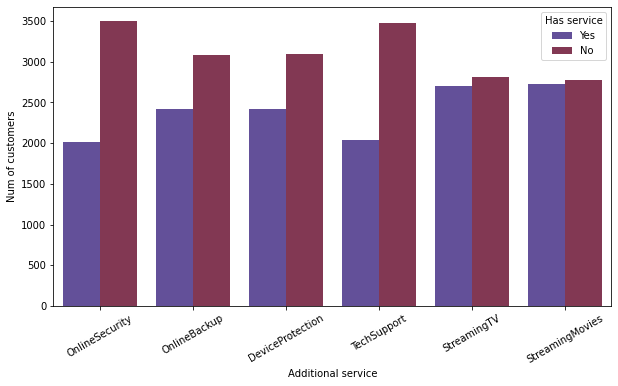

In [15]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10,5.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service',hue_order=['Yes','No'],palette='twilight')
ax.set(xlabel='Additional service', ylabel='Num of customers')
ax.set_xticklabels(labels=["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"],rotation=30)
plt.show()

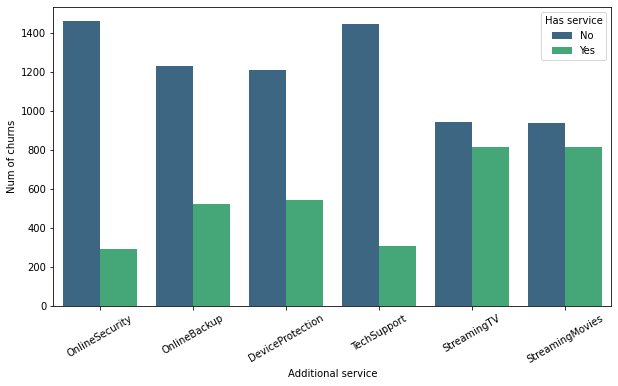

In [16]:
plt.figure(figsize=(10, 5.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'],palette='viridis')
ax.set(xlabel='Additional service', ylabel='Num of churns')
ax.set_xticklabels(labels=["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"],rotation=30)
plt.show()

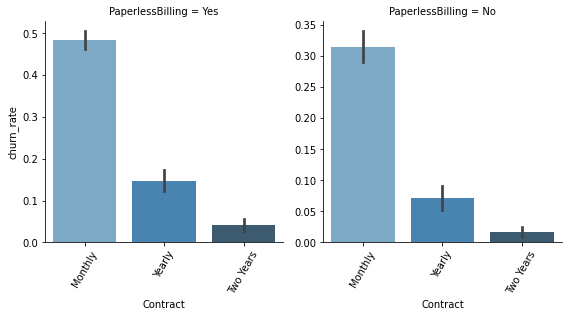

In [17]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=1,sharey=False)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])
g.set_xticklabels(labels=['Monthly','Yearly','Two Years'],rotation=60)

C:\Users\siddh\AppData\Local\Temp/ipykernel_5776/1963444524.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


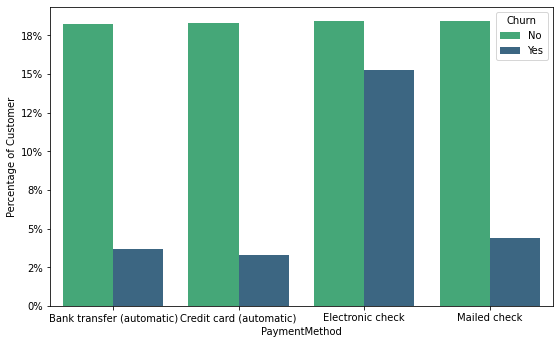

In [18]:
plt.figure(figsize=(9, 5.5))
barplot("PaymentMethod")

Machine Learning Models

In [19]:
df.drop('churn_rate',axis=1,inplace=True)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
X = df.iloc [:,0:20]# independent
y = df.iloc [:,-1]# dependent
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X['customerID'] = lb.fit_transform(X['customerID'])
X['gender'] = lb.fit_transform(X['gender'])
X['Partner'] = lb.fit_transform(X['Partner'])
X['Dependents'] = lb.fit_transform(X['Dependents'])
X['PhoneService'] = lb.fit_transform(X['PhoneService'])
X['MultipleLines'] = lb.fit_transform(X['MultipleLines'])
X['InternetService'] = lb.fit_transform(X['InternetService'])
X['OnlineSecurity'] = lb.fit_transform(X['OnlineSecurity'])
X['OnlineBackup'] = lb.fit_transform(X['OnlineBackup'])
X['DeviceProtection'] = lb.fit_transform(X['DeviceProtection'])
X['TechSupport'] = lb.fit_transform(X['TechSupport'])
X['StreamingTV'] = lb.fit_transform(X['StreamingTV'])
X['StreamingMovies'] = lb.fit_transform(X['StreamingMovies'])
X['Contract'] = lb.fit_transform(X['Contract'])
X['PaperlessBilling'] = lb.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = lb.fit_transform(X['PaymentMethod'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = .10, random_state = 100)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train_norm = independent_scalar.fit_transform (X_train) #fit and transform
X_test_norm = independent_scalar.transform (X_test) # only transform
#print(X)
X = independent_scalar.fit_transform(X)
print(X)

[[ 0.91110011 -1.00943013 -0.44032709 ...  0.39980518 -1.16169394
  -0.99419409]
 [ 0.21552111  0.99065797 -0.44032709 ...  1.33663626 -0.26087792
  -0.17373982]
 [-0.47168335  0.99065797 -0.44032709 ...  1.33663626 -0.36392329
  -0.95964911]
 ...
 [-0.0775876  -1.00943013 -0.44032709 ...  0.39980518 -1.17000405
  -0.85451414]
 [ 1.1859819   0.99065797  2.27103902 ...  1.33663626  0.31916782
  -0.87209546]
 [-0.63769619  0.99065797 -0.44032709 ... -1.47385696  1.35793167
   2.01234407]]


0.59375


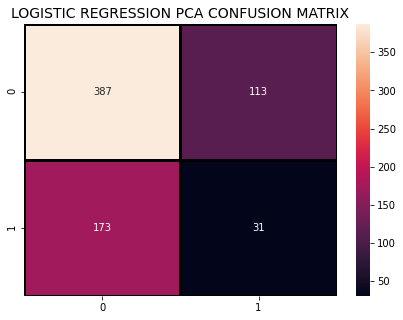

In [28]:
from sklearn.decomposition import PCA

pc = PCA(n_components=12)
X_train_pca=pc.fit_transform(X_train_norm)
X_test_pca = pc.fit_transform(X_test_norm)
# print(pc.explained_variance_ratio_)

from sklearn.linear_model import LogisticRegression
LRClassifier = LogisticRegression ()# object  of algorithm
LRClassifier.fit (X_train_pca, y_train)
prediction = LRClassifier.predict (X_test_pca)
# print(prediction)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction))
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix (y_test, prediction)
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, prediction),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title(label="LOGISTIC REGRESSION PCA CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
LRClassifier = LogisticRegression ()# object  of algorithm
LRClassifier.fit (X_train_norm, y_train)

prediction = LRClassifier.predict (X_test_norm)
# print(prediction)
# print(y_test)
print(accuracy_score(y_test, prediction))

0.8096590909090909


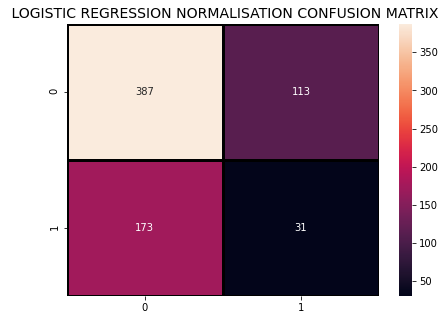

In [27]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix (y_test, prediction)
# confusionMatrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, prediction),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" LOGISTIC REGRESSION NORMALISATION CONFUSION MATRIX",fontsize=14)
plt.show()

0.796875


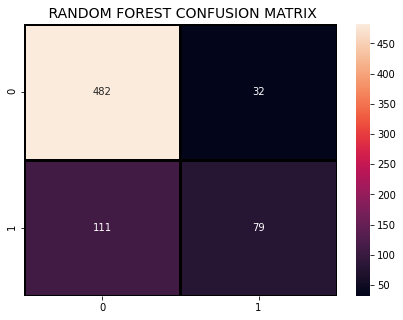

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5, random_state=20, max_depth=5, criterion = 'entropy')

model.fit(X_train_norm, y_train)
predict=model.predict(X_test_norm)
print(accuracy_score(y_test, predict))
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, predict),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

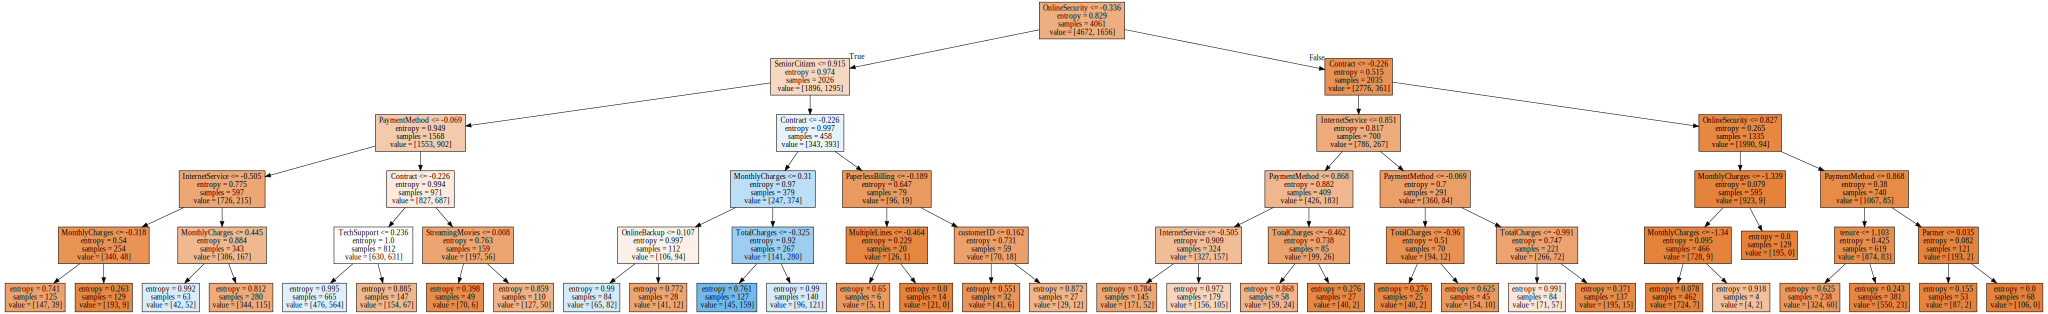

In [ ]:
X = df.iloc [:,0:20]
estimators=model.estimators_[3]
labels = X.columns
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

graph = Source(tree.export_graphviz(estimators, out_file=None, feature_names=labels, filled = True))
display(SVG(graph.pipe(format='svg')))